### Total capacity estimation for HEV case 1
This notebook implements the different total-capacity estimation methods for the HEV case 1 scenario in lesson 4.4.2. 

In [1]:
% Note that xLSalgos.m is stored in the "readonly" path
addpath readonly

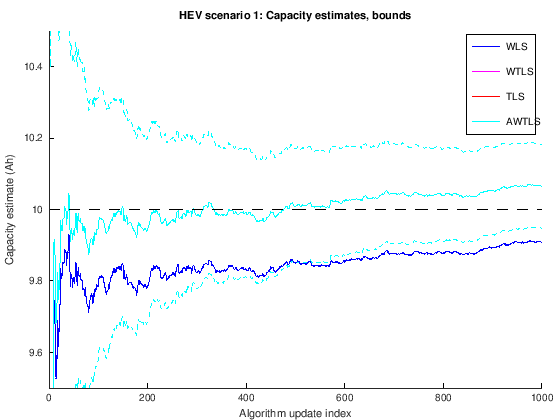

In [2]:
% Specific setup for HEV case 1
Q0 = 10;
maxI = 30*Q0;      % must be able to measure current up to +/- maxI
precisionI = 1024; % 10-bit precision on current sensor
slope = 0;
Qnom = 0;
xmax = 0.2;
xmin = -xmax;
m = 300;
theCase = 1;
socnoise = sqrt(2)*0.01;
gamma = 1;
plotTitle = 'HEV scenario 1';

% YOU MUST NOT CHANGE THE FOLLOWING LINE IN ORDER TO ARRIVE AT "CORRECT" ANSWERS 
% FOR THE QUIZ. IF YOU CHANGE IT TO EXPLORE THE BEHAVIOR OF THE XLS METHODS FOR 
% DIFFERENT PSEUDO-RANDOM SEQUENCES, CHANGE IT BACK TO rand('state',1); randn('state',1);
% BEFORE COMPUTING RESULTS TO ENTER AS QUIZ RESPONSES.
rand('state',1); randn('state',1);

% The remainder of this Jupyter notebook cell is the script "runScenario.m"
n = 1000;                           % number of data points collected
Q = (Q0+slope*(1:n))';              % evolution of true capacity over time
x = ((xmax-xmin)*rand(n,1)+xmin);   % true x(i), without noise
y = Q.*x;                           % true y(i), without noise

binsize = 2*maxI/precisionI;        % resolution of current sensor
rn1 = ones(n,1);                    % init std. dev. for each measurement
sx = socnoise*rn1;                  % scale Gaussian std. dev.
if theCase == 1,                    % the typical case (true for HEV case 1)
  rn2 = rn1;                        % same scale on y(i) as x(i) noise
  sy = binsize*sqrt(m/12)/3600*rn2; % std. dev. for y(i)
else % this case will be discussed for BEV case 3
  mu = log(mode)+sigma^2;   
  m = 3600*lognrnd(mu,sigma,n,1);   
  sy = binsize*sqrt(m/12)/3600;     % std.dev. for y(i)
end

x = x + sx.*randn(n,1);             % measured x(i) data, including noise
y = y + sy.*randn(n,1);             % measured y(i) data, including noise

% Execute the algorithms
[Qhat,SigmaQ] = xLSalgos(x,y,sx.^2,sy.^2,gamma,Qnom,sy(1)^2);

% Plot estimates of capacity for HEV case 1
hold on
plot(Qhat(:,1),'b','linewidth',3); % WLS
plot(Qhat(:,2),'m','linewidth',3); % WTLS
plot(Qhat(:,3),'r','linewidth',3); % TLS
plot(Qhat(:,4),'c','linewidth',3); % AWTLS

xlabel('Algorithm update index');
ylabel('Capacity estimate (Ah)');
title(sprintf('%s: Capacity estimates, bounds',plotTitle));
legend('WLS','WTLS','TLS','AWTLS','location','northeast');

% Plot 3-sigma bounds
plot(Qhat(:,1)+3*sqrt(SigmaQ(:,1)),'b--','linewidth',0.5);
plot(Qhat(:,2)+3*sqrt(SigmaQ(:,2)),'m--','linewidth',0.5);
plot(Qhat(:,3)+3*sqrt(SigmaQ(:,3)),'r--','linewidth',0.5);
plot(Qhat(:,4)+3*sqrt(SigmaQ(:,4)),'c--','linewidth',0.5);
plot(Qhat(:,1)-3*sqrt(SigmaQ(:,1)),'b--','linewidth',0.5);
plot(Qhat(:,2)-3*sqrt(SigmaQ(:,2)),'m--','linewidth',0.5);
plot(Qhat(:,3)-3*sqrt(SigmaQ(:,3)),'r--','linewidth',0.5);
plot(Qhat(:,4)-3*sqrt(SigmaQ(:,4)),'c--','linewidth',0.5);

% Plot over top to make sure estimate is on top of bounds
plot(Qhat(:,1),'b','linewidth',3); % WLS
plot(Qhat(:,2),'m','linewidth',3); % WTLS
plot(Qhat(:,3),'r','linewidth',3); % TLS
plot(Qhat(:,4),'c','linewidth',3); % AWTLS

% Plot true capacity
plot(1:length(x),Q,'k--','linewidth',1);  ylim([9.5 10.5]);